In [2]:
using Oscar

Implementation of Tropical Geometry in Oscar is joint work with Yue Ren (Durham University).

## Tropical arithmetic

$\min$ and $\max$ are both supported: $\min$ is the default. 

In [3]:
T = TropicalSemiring(max)

Tropical semiring (max)

In [4]:
T(1) + T(2)

(2)

In [5]:
T = TropicalSemiring()

Tropical semiring (min)

In [6]:
T(1)+T(2)

(1)

`TropicalSemiring` is subtype of `AbstractAlgebra.Field` with warnings when subtraction is required, unless a subtraction-free implementation has been provided.

In [7]:
 A = matrix(T, [0 1 3 7; 2 0 1 3; 4 5 0 1; 6 3 1 0 ]);

In [8]:
det(A)

(0)

## Tropical hypersurfaces

In [9]:
TXY,(X,Y) = T["X","Y"]

(Multivariate Polynomial Ring in X, Y over Tropical semiring (min), AbstractAlgebra.Generic.MPoly{Oscar.TropicalSemiringElem{typeof(min)}}[X, Y])

In [10]:
F = 3*X^3 + 1*X^2*Y + 1*X*Y^2 + 3*Y^3 + 1*X^2 + X*Y + 1*Y^2 + 1*X + 1*Y+3; 

$F$ defines a tropical curve in $\mathbb{R}^2$. 

In [11]:
TF = TropicalHypersurface(F);

In [12]:
dim(TF)

1

In [13]:
vertices(TF)

9-element SubObjectIterator{PointVector{fmpq}}:
 [1, 0]
 [0, -2]
 [0, -1]
 [-1, -1]
 [-2, 0]
 [-1, 0]
 [0, 1]
 [1, 1]
 [2, 2]

In [14]:
weights(TF)

pm::Vector<pm::Integer>
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [15]:
polynomial(TF)

(3)*X^3 + (1)*X^2*Y + (1)*X^2 + (1)*X*Y^2 + X*Y + (1)*X + (3)*Y^3 + (1)*Y^2 + (1)*Y + (3)

Tropical hypersurfaces (and more generally tropical varieties) are supports of polyhedral complexes.

A polyhedral complex is a nice collection of polyhedra, which are finite intersections of closed halfspaces. 

In [16]:
PC = underlying_polyhedral_complex(TF)

A polyhedral complex in ambient dimension 2

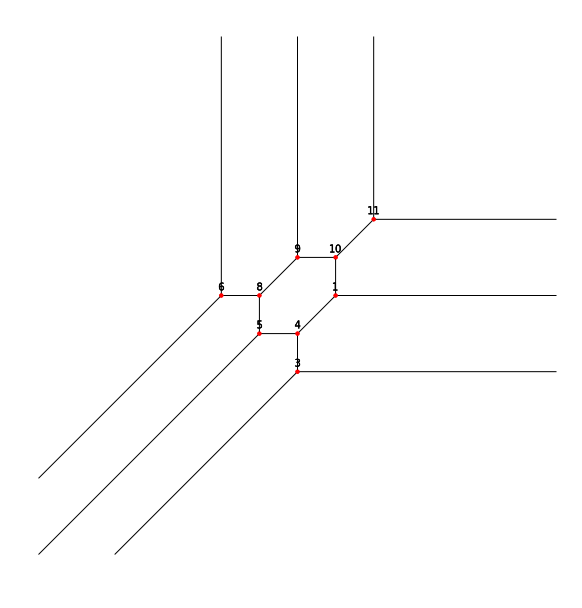

In [17]:
visualize(PC)

In [18]:
MP = maximal_polyhedra(PC)

18-element SubObjectIterator{Polyhedron{fmpq}}:
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2

In [19]:
vertices(MP[1])

1-element SubObjectIterator{PointVector{fmpq}}:
 [2, 2]

In [20]:
facets(MP[1])

1-element SubObjectIterator{AffineHalfspace{fmpq}} over the Halfspaces of R^2 described by:
-x₂ ≦ -2


Let's now look at the subdivision induced by the coefficients of the polynomial $F$ on the lattice points of its Newton polytope. 

In [21]:
DS = dual_subdivision(TF);

In [22]:
maximal_cells(DS)

9-element SubObjectIterator{Vector{Int64}}:
 [2, 4, 7]
 [4, 7, 9]
 [4, 8, 9]
 [6, 8, 9]
 [6, 8, 10]
 [5, 7, 9]
 [3, 5, 9]
 [3, 6, 9]
 [1, 3, 5]

## Triangulations

Triangulations encode combinatorial types of tropical hypersurfaces. 

Let's look at all combinatorial types of tropical curves of degree $2$. The Newton polytope is conv$((0,0),(2,0),(0,2))$. 

In [23]:
pts = [0 0; 1 0; 0 1; 2 0; 1 1; 0 2]

6×2 Matrix{Int64}:
 0  0
 1  0
 0  1
 2  0
 1  1
 0  2

TOPCOM (Rambau) and MPTOPCOM (Jordan-Joswig-Kastner) are two software to compute triangulations of point configuration. 

TOPCOM is interfaced in Oscar, MPTOPCOM is coming soon. 

In [24]:
trns = Oscar.topcom_regular_triangulations(pts)

14-element Vector{Vector{Vector{Int64}}}:
 [[1, 2, 3], [2, 3, 4], [3, 4, 5], [3, 5, 6]]
 [[1, 2, 3], [3, 5, 6], [2, 4, 5], [2, 3, 5]]
 [[1, 2, 3], [2, 3, 4], [3, 4, 6]]
 [[3, 4, 5], [3, 5, 6], [1, 3, 4]]
 [[1, 2, 3], [2, 4, 5], [2, 5, 6], [2, 3, 6]]
 [[3, 5, 6], [2, 4, 5], [1, 3, 5], [1, 2, 5]]
 [[1, 2, 3], [2, 3, 6], [2, 4, 6]]
 [[3, 4, 6], [1, 3, 4]]
 [[3, 5, 6], [1, 3, 5], [1, 4, 5]]
 [[2, 4, 5], [2, 5, 6], [1, 2, 6]]
 [[2, 4, 5], [1, 2, 5], [1, 5, 6]]
 [[1, 4, 6]]
 [[2, 4, 6], [1, 2, 6]]
 [[1, 4, 5], [1, 5, 6]]

In [25]:
lattice_volume(convex_hull(pts))

4

If we want to look at unimodular triangulations, we need to select the ones with $4$ triangles. 

In [26]:
uni_trns = filter(trn -> length(trn)==4, trns)

4-element Vector{Vector{Vector{Int64}}}:
 [[1, 2, 3], [2, 3, 4], [3, 4, 5], [3, 5, 6]]
 [[1, 2, 3], [3, 5, 6], [2, 4, 5], [2, 3, 5]]
 [[1, 2, 3], [2, 4, 5], [2, 5, 6], [2, 3, 6]]
 [[3, 5, 6], [2, 4, 5], [1, 3, 5], [1, 2, 5]]

What about symmetries?

In [27]:
G = symmetric_group(6)
g1 = G([1,3,2,6,5,4])
g2 = G([4,2,5,1,3,6])
H,_ = subgroup(G,[g1,g2])

(Group([ (2,3)(4,6), (1,4)(3,5) ]), Group homomorphism from 
Group([ (2,3)(4,6), (1,4)(3,5) ])
to
Sym( [ 1 .. 6 ] ))

In [28]:
elements(H)

6-element Vector{PermGroupElem}:
 ()
 (2,3)(4,6)
 (1,4)(3,5)
 (1,4,6)(2,5,3)
 (1,6,4)(2,3,5)
 (1,6)(2,5)

In [29]:
all_orbits = [on_sets_sets(uni_trns[1],g) for g in H]
trns_mod_symm = [uni_trns[1]]
for i in 2:4
    for g in H 
        new_trns = on_sets_sets(uni_trns[i],g)
        if  all(t -> t!= new_trns, all_orbits)
            push!(trns_mod_symm,uni_trns[i])
            break
        end
        push!(all_orbits,new_trns)
    end
end

In [30]:
trns_mod_symm

2-element Vector{Vector{Vector{Int64}}}:
 [[1, 2, 3], [2, 3, 4], [3, 4, 5], [3, 5, 6]]
 [[1, 2, 3], [3, 5, 6], [2, 4, 5], [2, 3, 5]]

There is also the polyhedral object `SubdivisionOfPoints`. 

In [31]:
cells = IncidenceMatrix(uni_trns[1])

4×6 IncidenceMatrix
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[3, 5, 6]


In [32]:
S = SubdivisionOfPoints(pts,cells)

A subdivision of points in ambient dimension 2

In [33]:
is_regular(S)

true

In [34]:
min_weights(S)

pm::Vector<long>
1 0 0 0 1 3

We can also look at the same construction using `Polymake.jl`.

In [35]:
pts_hom = homogenize(pts,1)

6×3 Matrix{Int64}:
 1  0  0
 1  1  0
 1  0  1
 1  2  0
 1  1  1
 1  0  2

In [36]:
PS = Polymake.fan.SubdivisionOfPoints(POINTS=pts_hom,MAXIMAL_CELLS=cells)

type: SubdivisionOfPoints<Rational>

MAXIMAL_CELLS
	{0 1 2}
	{1 2 3}
	{2 3 4}
	{2 4 5}

POINTS
  1  0  0
  1  1  0
  1  0  1
  1  2  0
  1  1  1
  1  0  2

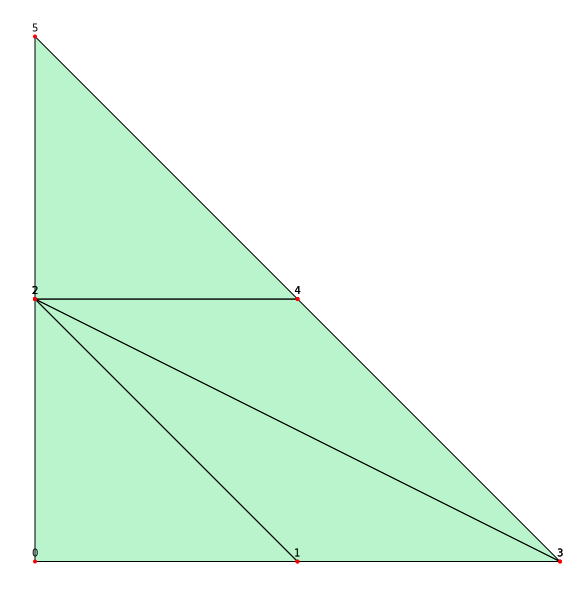

In [37]:
Polymake.visual(PS)

## Tropical Intersection

In [38]:
TF

A min tropical hypersurface embedded in 2-dimensional Euclidian space

In [39]:
G = X+Y+1

X + Y + (1)

In [40]:
L = TropicalHypersurface(G)

A min tropical hypersurface embedded in 2-dimensional Euclidian space

In [41]:
I = intersect(TF,L)

A min tropical variety of dimension 1 embedded in 2-dimensional Euclidian space

In [42]:
vertices(I)

2-element SubObjectIterator{PointVector{fmpq}}:
 [1, 1]
 [-1, -1]

In [43]:
PCI = underlying_polyhedral_complex(I)

A polyhedral complex in ambient dimension 2

In [44]:
MP = maximal_polyhedra(PCI)

2-element SubObjectIterator{Polyhedron{fmpq}}:
 A polyhedron in ambient dimension 2
 A polyhedron in ambient dimension 2

In [45]:
dim(MP[1]) 

0

In [46]:
 dim(MP[2])

1

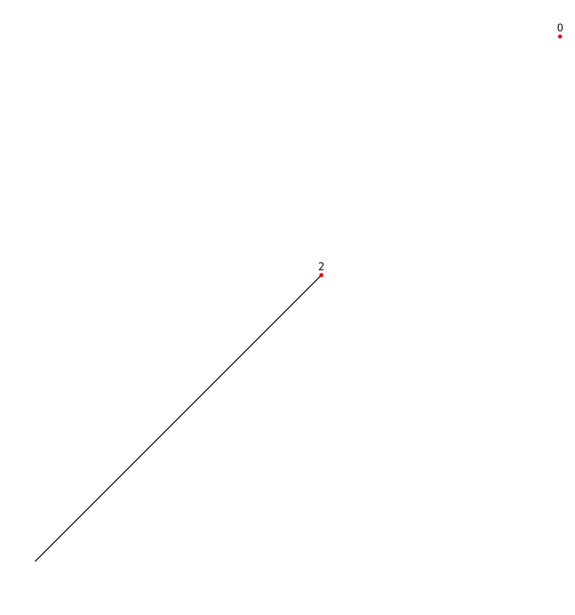

In [47]:
visualize(PCI)

## Tropicalization 

In [48]:
K = PadicField(2, 2); Kxyz, (x,y,z) = K["x", "y", "z"]

(Multivariate Polynomial Ring in x, y, z over Field of 2-adic numbers, AbstractAlgebra.Generic.MPoly{padic}[x, y, z])

In [49]:
f = 12*x^2+20*y^2+8*z^2+7*x*y+22*x*z+3*y*z+5*x+9*y+6*z+4;

In [50]:
tropical_polynomial(f)

(2)*x^2 + x*y + (1)*x*z + x + (2)*y^2 + y*z + y + (3)*z^2 + (1)*z + (2)

In [51]:
TH = TropicalHypersurface(f,min)

A min tropical hypersurface embedded in 3-dimensional Euclidian space

In [52]:
PC = underlying_polyhedral_complex(TH)

A polyhedral complex in ambient dimension 3

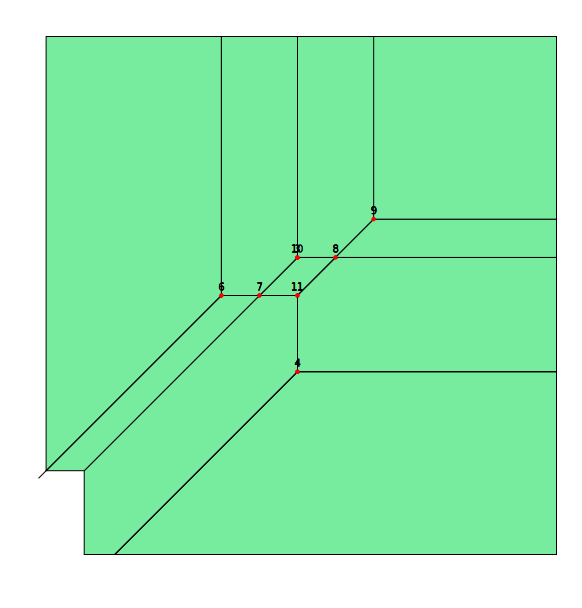

In [53]:
visualize(PC)

In [54]:
Kt, t = RationalFunctionField(QQ,"t");

In [55]:
val = TropicalSemiringMap(Kt,t);

In [56]:
 A = matrix(Kt,[[t,4*t,0,2*t],[1,4*t,1,t^2]])

[t   4*t   0   2*t]
[1   4*t   1   t^2]

In [57]:
Lin = TropicalLinearSpace(A, val);

In [58]:
dim(Lin)

1

In [59]:
f_vector(Lin)

2-element Vector{Int64}:
 2
 5

In [60]:
vertices(Lin)

2-element SubObjectIterator{PointVector{fmpq}}:
 [0, 0, 0, 0]
 [0, 1, 0, 1]